**Đọc dữ liệu**

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('AMZN.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

         Date        Open        High  ...       Close   Adj Close   Volume
0  2011-08-25  194.410004  196.990005  ...  192.029999  192.029999  3760800
1  2011-08-26  191.240005  199.720001  ...  199.270004  199.270004  5310700
2  2011-08-29  202.820007  206.669998  ...  206.529999  206.529999  4511000
3  2011-08-30  205.779999  212.490005  ...  210.919998  210.919998  5915700
4  2011-08-31  212.270004  216.169998  ...  215.229996  215.229996  7405000

[5 rows x 7 columns]


Open   --- mean : 1132.4860578592998   	 Std:  982.6965103799303   	 Max:  3744.0   	 Min:  169.619995
High   --- mean : 1144.124454300479   	 Std:  993.1893743893046   	 Max:  3773.080078   	 Min:  174.550003
Low    --- mean : 1119.2946580401438   	 Std:  970.5059838632731   	 Max:  3696.790039   	 Min:  166.970001
Close  --- mean : 1132.106783835852   	 Std:  981.8653185780692   	 Max:  3731.4099119999996   	 Min:  173.100006
Volume --- mean : 4177713.3147853734   	 Std:  2289938.3905063425   	 Max:  24134200   	

**Các function**

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)
# Hàm chuẩn hóa dữ liệu
def get_normalised_data(data):
    """
    Normalises the data values using MinMaxScaler from sklearn
    :param data: a DataFrame with columns as  ['index','Open','Close','Volume']
    :return: a DataFrame with normalised value for all the columns except index
    """
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler()
    numerical = [ 'Close']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

# hàm remove các features không sử dụng
def remove_data(data):
    """
    Remove columns from the data
    :param data: a record of all the stock prices with columns as  ['Date','Open','High','Low','Close','Volume']
    :return: a DataFrame with columns as  ['index','Open','Close','Volume']
    """
    # Define columns of data to keep from historical stock data
    item = []
    close = []
    # Loop through the stock data objects backwards and store factors we want to keep
    i_counter = 0
    for i in range(len(data) - 1, -1, -1):
        item.append(i_counter)
        close.append(data['Close'][i])
        i_counter += 1
    # Create a data frame for stock data
    stocks = pd.DataFrame()
    # Add factors to data frame
    stocks['Item'] = item
    stocks['Close'] = pd.to_numeric(close)
    # return new formatted data
    return stocks

# Hàm plot
def plot_basic(stocks, title='AMAZON', y_label='Price USD', x_label='Trading Days'):
    """
    Plots basic pyplot
    :param stocks: DataFrame having all the necessary data
    :param title:  Title of the plot 
    :param y_label: yLabel of the plot
    :param x_label: xLabel of the plot
    :return: prints a Pyplot againts items and their closing value
    """
    fig, ax = plt.subplots()
    ax.plot(stocks['Item'], stocks['Close'], '#0A7388')

    ax.format_ydata = price
    ax.set_title(title)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x

**Loại bỏ các features không sử dụng**

In [4]:
stocks = remove_data(data)

#Print the dataframe head and tail
print(len(stocks))
print(stocks.head())
print("---")
print(stocks.tail())

2516
   Item        Close
0     0  3305.780029
1     1  3265.870117
2     2  3199.949951
3     3  3187.750000
4     4  3201.219971
---
      Item       Close
2511  2511  215.229996
2512  2512  210.919998
2513  2513  206.529999
2514  2514  199.270004
2515  2515  192.029999


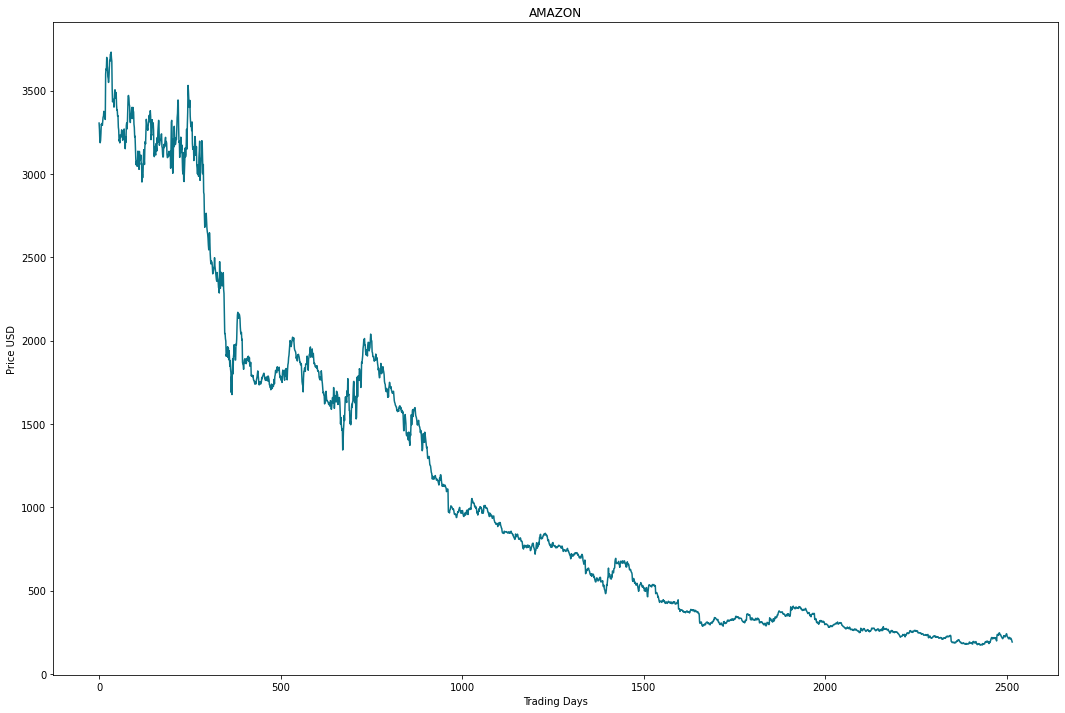

In [5]:
plot_basic(stocks)

**chuẩn hóa dữ liệu**

In [6]:
stocks = get_normalised_data(stocks)
print(stocks.head())
print("---")
print(stocks.tail())
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))


   Item     Close
0     0  0.880384
1     1  0.869168
2     2  0.850643
3     3  0.847214
4     4  0.851000
---
      Item     Close
2511  2511  0.011840
2512  2512  0.010629
2513  2513  0.009395
2514  2514  0.007355
2515  2515  0.005320
Close  --- mean : 0.26951187591018433   	 Std:  0.2759358640804315   	 Max:  1.0   	 Min:  0.0


In [7]:
print(len(stocks))

2516


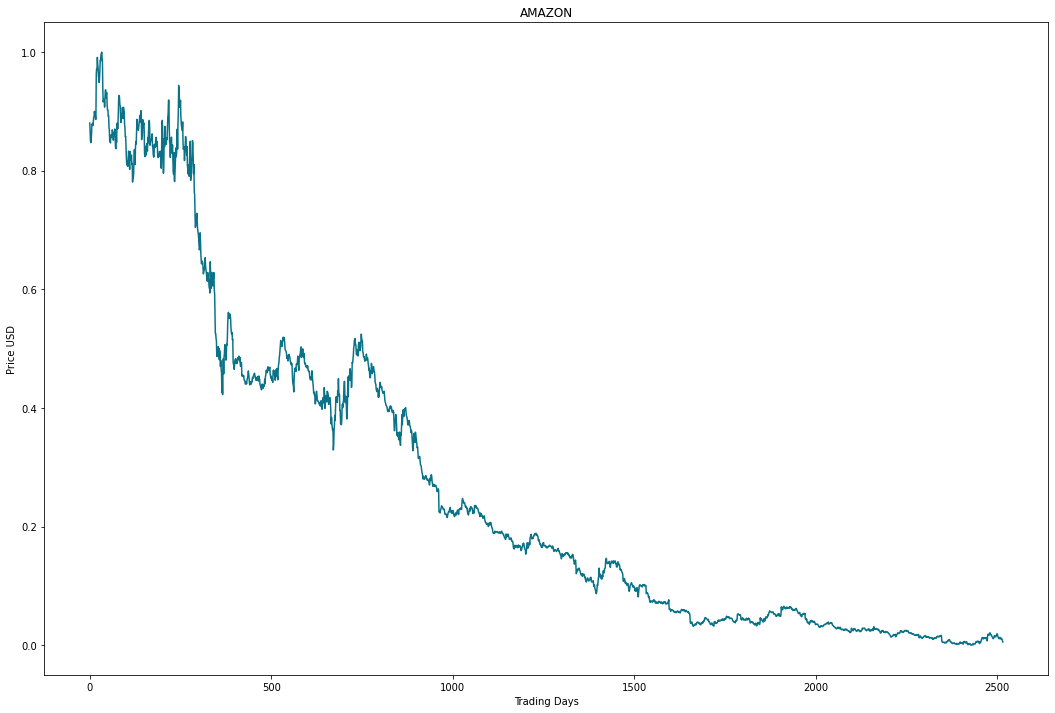

In [8]:
plot_basic(stocks)

**Lưu lại data đã xử lý**

In [9]:
stocks.to_csv('amazon_preprocessed.csv',index= False)

In [10]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold


stocks = pd.read_csv('amazon_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)
print(len(stocks_data))
display(stocks_data.head())

2516


,Close
0,0.880384
1,0.869168
2,0.850643
3,0.847214
4,0.851000


In [11]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=450, unroll_length=50):  

  #training data
  test_data_cut = test_data_size + unroll_length + 1 # tru thu xem sao
  x_train = stocks[0:-prediction_time - test_data_cut].values
  print(len(x_train))
  y_train = stocks[prediction_time:-test_data_cut]['Close'].values
  print(len(y_train))
  # test data
  x_test = stocks[0 - test_data_cut:-prediction_time].values
  y_test = stocks[prediction_time - test_data_cut:]['Close'].values
  print(len(x_test))
  print(len(y_test))
  return x_train, x_test, y_train, y_test

def unroll(data, sequence_length=24):
    """
    use different windows for testing and training to stop from leak of information in the data
    :param data: data set to be used for unrolling
    :param sequence_length: window length
    :return: data sets with different window.
    """
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

**tách và reshape lại data đầu vào**

In [12]:
X_train, X_test,y_train, y_test = train_test_split_lstm(stocks_data, 5)
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
unroll_length = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

2010
2010
496
496
x_train (2010, 1)
y_train (2010,)
x_test (496, 1)
y_test (496,)
x_train (1960, 50, 1)
y_train (1960,)
x_test (446, 50, 1)
y_test (446,)


 **Xây dựng mô hình LSTM**

In [ ]:
print(len(X_test))

446


In [13]:

def build_improved_model(input_dim, output_dim, return_sequences):
    """
    Builds an improved Long Short term memory model using keras.layers.recurrent.lstm
    :param input_dim: input dimension of model
    :param output_dim: ouput dimension of model
    :param return_sequences: return sequence for the model
    :return: a 3 layered LSTM model
    """
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))

    model.add(LSTM(
        128,
        return_sequences=False))
    
    model.add(Dropout(0.2))


    model.add(Dense(
        units=1))
    model.add(Activation('linear'))

    return model

**Setup thông số huấn luyện**

In [14]:

batch_size = 100
epochs = 100

model = build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)


#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 50)          10400     
_________________________________________________________________
dropout (Dropout)            (None, None, 50)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 102,177
Trainable params: 102,177
Non-trainable params: 0
__________________________________________________

**Training**

In [16]:
history=model.fit(X_train, 
          y_train, 
          batch_size=140,
          epochs=150,
          verbose=2,
          validation_split=0.05,#tang len
          
          )

Epoch 1/150
14/14 - 11s - loss: 0.0429 - val_loss: 0.0023
Epoch 2/150
14/14 - 4s - loss: 0.0054 - val_loss: 0.0013
Epoch 3/150
14/14 - 4s - loss: 0.0020 - val_loss: 4.9185e-05
Epoch 4/150
14/14 - 4s - loss: 0.0016 - val_loss: 3.7281e-05
Epoch 5/150
14/14 - 4s - loss: 0.0015 - val_loss: 1.6377e-04
Epoch 6/150
14/14 - 4s - loss: 0.0015 - val_loss: 8.1011e-05
Epoch 7/150
14/14 - 4s - loss: 0.0013 - val_loss: 3.0598e-05
Epoch 8/150
14/14 - 4s - loss: 0.0014 - val_loss: 2.4736e-05
Epoch 9/150
14/14 - 4s - loss: 0.0014 - val_loss: 3.2607e-05
Epoch 10/150
14/14 - 4s - loss: 0.0014 - val_loss: 3.5800e-05
Epoch 11/150
14/14 - 4s - loss: 0.0013 - val_loss: 5.9223e-05
Epoch 12/150
14/14 - 4s - loss: 0.0013 - val_loss: 3.8223e-05
Epoch 13/150
14/14 - 4s - loss: 0.0013 - val_loss: 5.2021e-05
Epoch 14/150
14/14 - 4s - loss: 0.0013 - val_loss: 3.9238e-05
Epoch 15/150
14/14 - 4s - loss: 0.0012 - val_loss: 3.8002e-05
Epoch 16/150
14/14 - 4s - loss: 0.0013 - val_loss: 2.3961e-05
Epoch 17/150
14/14 - 4s 

In [17]:
# Generate predictions 
predictions = model.predict(X_test)

In [18]:
#hàm plot 
def plot_lstm_prediction(actual, prediction, title='AMAZON vs Prediction', y_label='Price USD', x_label='Trading Days'):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')


    plt.show()

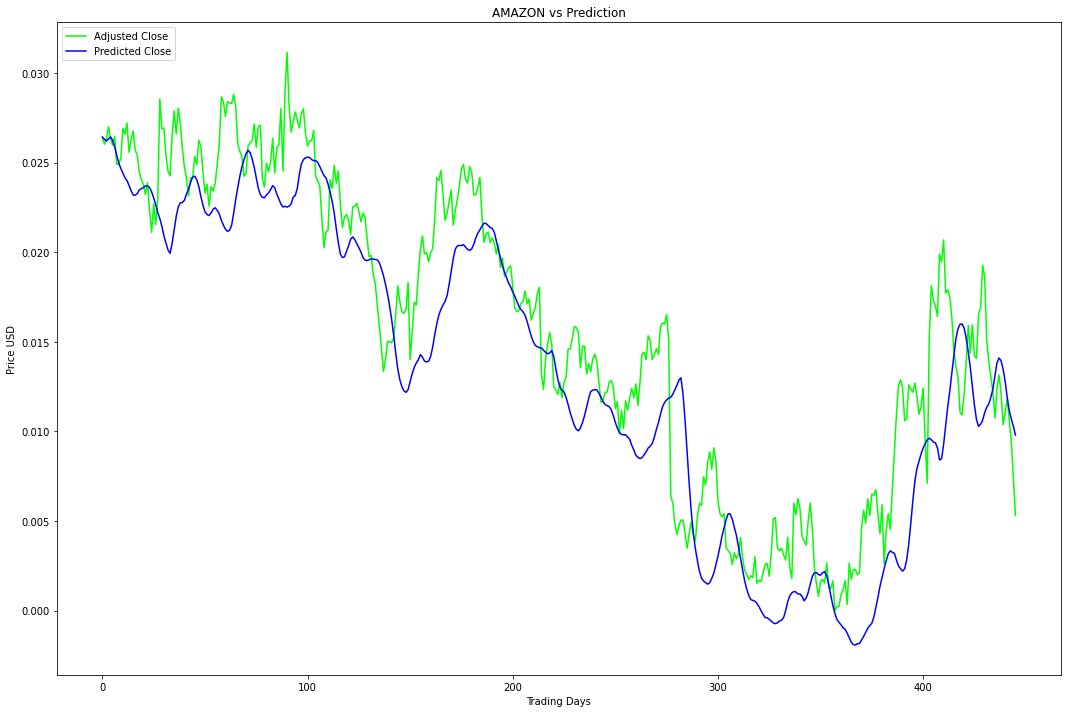

In [19]:
plot_lstm_prediction(y_test,predictions)

**Đánh giá mô hình**

In [20]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00049091 MSE (0.02215654 RMSE)
Test Score: 0.00001513 MSE (0.00388931 RMSE)


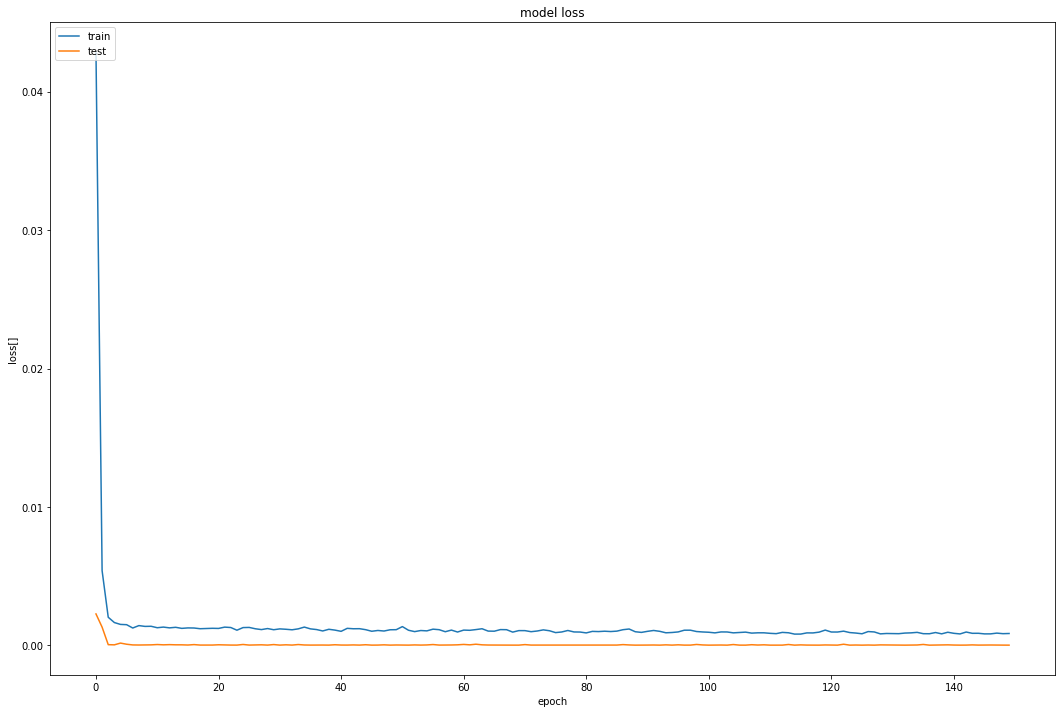

In [21]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss[]')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()